In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

In [40]:
X = 2 * np.random.rand(100, 1)  # 100 puntos de datos
y = X + np.random.randn(100, 1) # y = 4 + 3x + ruido

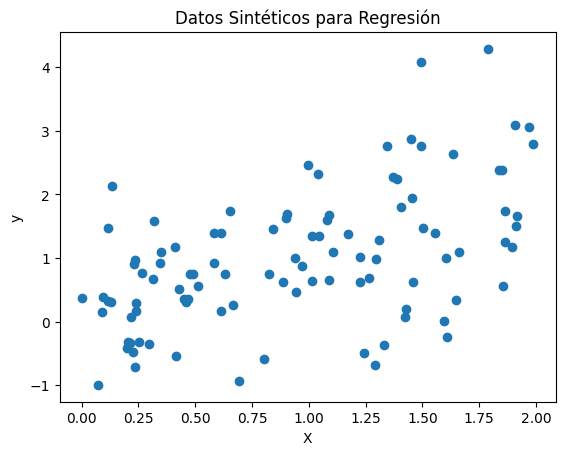

In [41]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Datos Sintéticos para Regresión")
plt.show()

--- BATCH LEARNING ---
Parámetros encontrados (intercepto, pendiente): (array([-0.01024378]), array([1.05548975]))


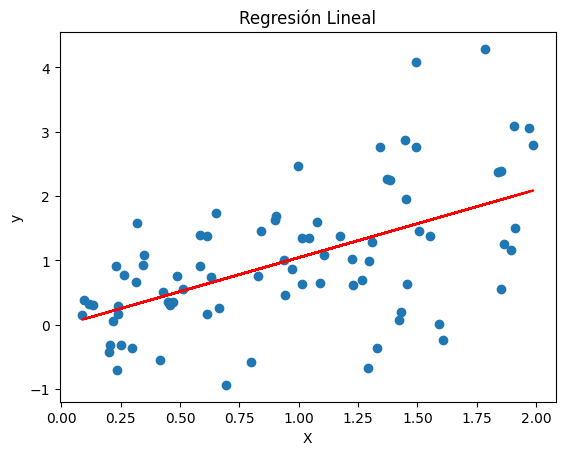

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1997)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("--- BATCH LEARNING ---")
print(f"Parámetros encontrados (intercepto, pendiente): {lin_reg.intercept_, lin_reg.coef_[0]}")

plt.scatter(X_train, y_train)
plt.plot(X_train, lin_reg.predict(X_train), color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal")
plt.show()

In [14]:
# --- Modelo Online ---
# n_epochs: cuántas veces recorremos el conjunto de datos completo
n_epochs = 50
m = len(X) # Número de muestras

# Inicializamos el regresor.
# max_iter=1 para que procese un solo ejemplo por llamada a .fit()
# warm_start=True para que recuerde los parámetros de la llamada anterior
sgd_reg = SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=0.1, warm_start=True)

print("\n--- ONLINE LEARNING ---")
# Bucle de entrenamiento
for epoch in range(n_epochs):
    for i in range(m):
        # Tomamos UNA SOLA muestra aleatoria
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # Le pasamos UNA SOLA muestra para que aprenda
        sgd_reg.fit(xi, yi.ravel())

# Parámetros finales después de aprender de uno en uno
print(f"Parámetros encontrados (intercepto, pendiente): {sgd_reg.intercept_, sgd_reg.coef_}")


--- ONLINE LEARNING ---
Parámetros encontrados (intercepto, pendiente): (array([0.06608089]), array([2.76641036]))


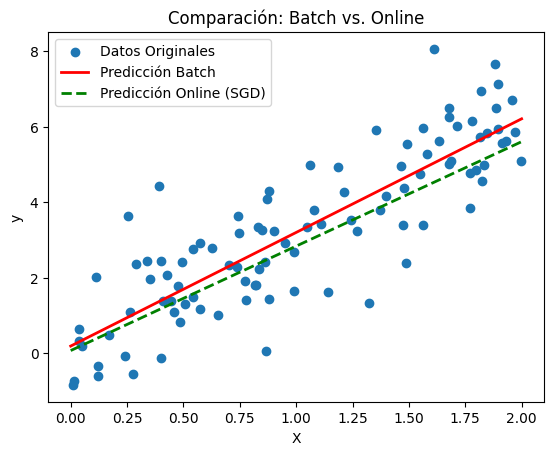

In [15]:
X_new = np.array([[0], [2]])
y_predict_batch = lin_reg.predict(X_new)
y_predict_online = sgd_reg.predict(X_new)

# Graficar todo junto
plt.scatter(X, y, label="Datos Originales")
plt.plot(X_new, y_predict_batch, "r-", linewidth=2, label="Predicción Batch")
plt.plot(X_new, y_predict_online, "g--", linewidth=2, label="Predicción Online (SGD)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparación: Batch vs. Online")
plt.legend()
plt.show()